In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
# DATA SETS NEED TO BE MOUNTED TO GDRIVE OR UPLOADED TO THE COLAB RUNTIME
# AND THE PATH NEEDS TO PASTED BELOW.

train_data = pd.read_csv('/content/drive/MyDrive/PRML/Assign1/dataset1/train21.csv', header=None)
test_data = pd.read_csv('/content/drive/MyDrive/PRML/Assign1/dataset1/test21.csv', header=None)

# DROP COLUMN 1
train_data = train_data.drop([1], axis=1)
test_data = test_data.drop([1], axis=1)

In [ ]:
#SPLITTING DATA
frac = 0.8
val_data = train_data[int(frac*len(train_data)):]
train_data = train_data[:int(frac*len(train_data))]

In [ ]:
#NORMALISE DATA USING Z-SCORE
def normalize(matrix):
    mean = np.mean(matrix)
    std = np.std(matrix)
    matrix = (matrix - mean)/std  # normalized matrix
    return matrix

# normalise only first column
train_data.iloc[:,0] = normalize(train_data.iloc[:,0])
val_data.iloc[:,0] = normalize(val_data.iloc[:,0])
test_data.iloc[:,0] = normalize(test_data.iloc[:,0])

train_data = train_data.values
test_data = test_data.values
val_data = val_data.values

In [ ]:
#ANY DEGREE POLYNOMIAL REGRESSION
#build model for only one column
def build_model(X, Y, degree, lmbda):
    ones = np.ones(len(X))
    terms = np.array([]).reshape(0, len(X))
    terms = np.vstack((terms, ones))

    for d in range(1, degree+1):
        terms = np.vstack((terms, X**d))

    X = terms.T
    XTX = X.T.dot(X)
    XTXL = XTX + lmbda * np.identity(XTX.shape[0])
    XTXL_inv = np.linalg.inv(XTXL)
    XTXL_invXT = XTXL_inv.dot(X.T)
    Y = np.array(Y).reshape(len(Y), 1)
    beta = XTXL_invXT.dot(Y)
    #beta = np.linalg.pinv(X).dot(Y)
    return beta

#predict for only one column
def predict(X, b, degree):
    ones = np.ones(len(X))
    terms = np.array([]).reshape(0, len(X))
    terms = np.vstack((terms, ones))
    for d in range(1, degree+1):
        terms = np.vstack((terms, X**d))
    X = terms.T
    Ys = X.dot(b)
    Ys.shape = (len(Ys),)
    return Ys

def absolute_error(Y, Ys):
    return abs(Y - Ys)

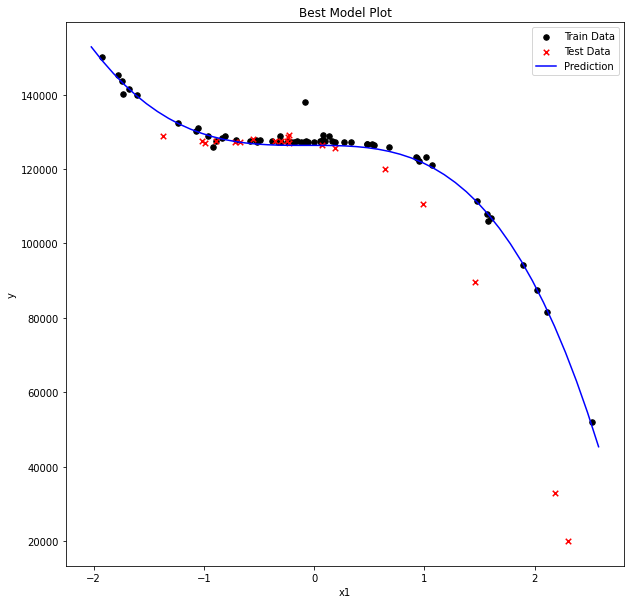

In [ ]:
# PLOTTING PREDICTED SURFACE
degree = 4 #OVERFITTING MODEL
lmbda = 0.4  #Best Lambda

beta = build_model(train_data[:,0], train_data[:,1], degree, lmbda) # build the model

step = 0.1

x = np.arange(train_data[:,0].min()-step, train_data[:,0].max() + step, step)
y = predict(x, beta, degree)

plt.figure(figsize=(10, 10))
plt.scatter(train_data[:,0], train_data[:,1], label="Train Data", c = 'black', s = 30)
plt.scatter(test_data[:,0], test_data[:,1], label="Test Data", c = 'red', s = 30, marker = 'x')
plt.plot(x, y, label="Prediction", c = 'blue')
plt.title('Best Model Plot')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()

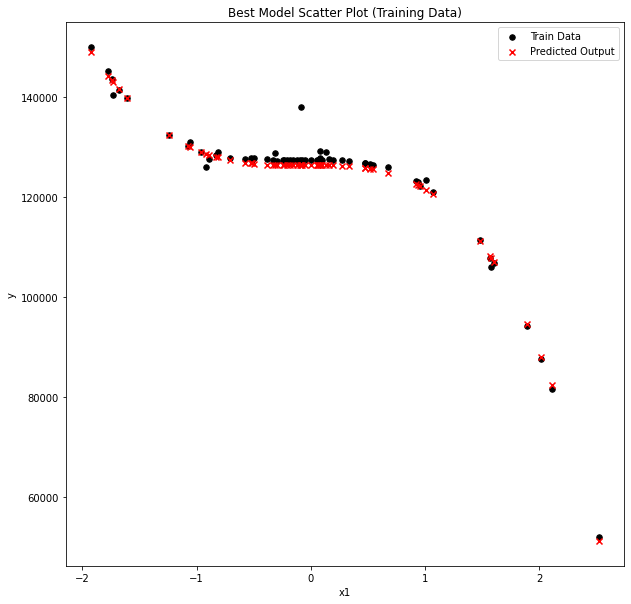

In [ ]:
# BEST MODEL SCATTERPLOT (TRAINING DATA)
degree = 4 #OVERFITTING MODEL
lmbda = 0.4  #Best Lambda

beta = build_model(train_data[:,0], train_data[:,1], degree, lmbda) # build the model

plt.figure(figsize=(10, 10))
plt.scatter(train_data[:,0], train_data[:,1], label="Train Data", c = 'black', s = 30)
plt.scatter(train_data[:, 0], predict(train_data[:,0], beta, degree), label="Predicted Output", marker = "x", c = "red")

plt.title('Best Model Scatter Plot (Training Data)')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()

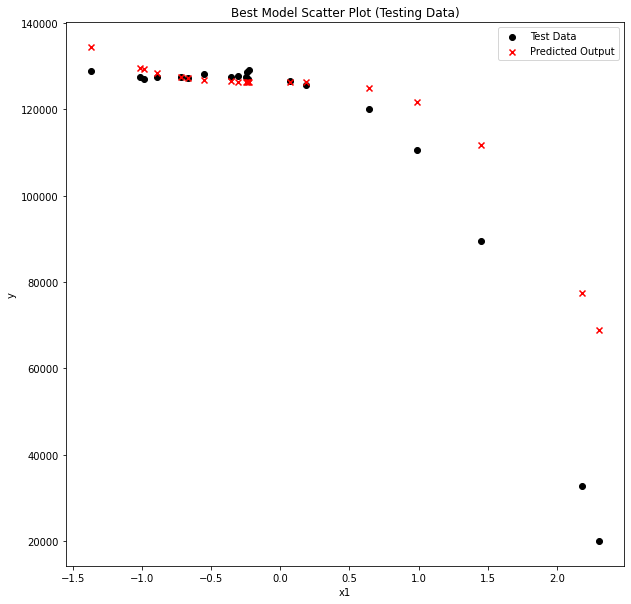

In [ ]:
# BEST MODEL SCATTERPLOT (TESTING DATA)
degree = 4 #OVERFITTING MODEL
lmbda = 0.4  #Best Lambda

beta = build_model(train_data[:,0], train_data[:,1], degree, lmbda) # build the model

plt.figure(figsize=(10, 10))
plt.scatter(test_data[:,0], test_data[:,1], label="Test Data", c = "black")
plt.scatter(test_data[:,0], predict(test_data[:,0], beta, degree), label="Predicted Output", marker = "x", c = "red")

plt.title('Best Model Scatter Plot (Testing Data)')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()

[23514458.012284245, 23231893.269915633, 22993682.444663078, 22798799.389189564, 22646253.96771686, 22535090.497038703, 22464386.265206944, 22433250.1235781, 22440821.148122553, 22486267.36616895, 22568784.54499461, 22687595.03888254, 22841946.691480085, 23031111.790471144, 23254386.07175053, 23511087.77051013, 23800556.7166716, 24122153.472419567, 24475258.50957263, 24859271.42476256, 25273610.190417685, 25717710.43978966, 26191024.784174893]


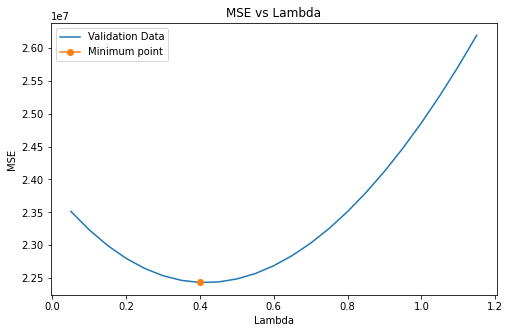

In [ ]:
#VARIATION of VALIDATION DATA WITH LAMBDA
degree = 4 # SOME OVERFITTING MODEL
def calulateMSE_test(lmbda):
    beta = build_model(train_data[:,0], train_data[:,1], degree, lmbda) # build the model
    Y_test = predict(test_data[:,0], beta, degree)   # predict the test data

    # Absolute Error
    delY_test = absolute_error(test_data[:,1], Y_test)
    MSE = np.sum(delY_test**2)/delY_test.size
    return MSE

def calulateMSE_train(lmbda):
    beta = build_model(train_data[:,0], train_data[:,1], degree, lmbda) # build the model
    Y_train = predict(train_data[:,0], beta, degree) # predict the train data

    # Absolute Error
    delY_train = absolute_error(train_data[:,1], Y_train)

    MSE = np.sum(delY_train**2)/delY_train.size
    return MSE

def calulateMSE_val(lmbda):
    beta = build_model(train_data[:,0], train_data[:,1], degree, lmbda) # build the model
    Y_val = predict(val_data[:,0], beta, degree)

    # Absolute Error
    delY_val = absolute_error(val_data[:,1], Y_val)

    MSE = np.sum(delY_val**2)/delY_val.size
    return MSE

l = 0.05
r = 1.2
step = 0.05

MSE_train = []
for i in np.arange(l, r, step):
    MSE_train.append(calulateMSE_train(i))

MSE_val = []
for i in np.arange(l, r, step):
    MSE_val.append(calulateMSE_val(i))


print(MSE_val)
index = np.arange(l, r, step)

i = np.argmin(MSE_val)
x_min = index[i]
y_min = MSE_val[i]

#plot the graph
fig = plt.figure(figsize = (8,5))
plt.title('MSE vs Lambda')
plt.xlabel('Lambda')
plt.ylabel('MSE')
# plt.plot(index, MSE_test, label = "Test Data")
plt.plot(index, MSE_val, label = "Validation Data")
plt.plot(x_min, y_min, label = "Minimum point", marker='o')
plt.legend()

[260080501.83814272, 276714817.25578725, 300156529.0535645, 329342316.8590698, 363477704.2518648, 401926433.51512945, 444157048.0292916, 489714162.54768944, 538201328.6807822, 589269823.7055032, 642610729.7905653, 697948995.5885214, 755038784.5719497, 813659714.1700308, 873613744.9600279, 934722564.2610581, 996825357.8589742, 1059776893.8746942, 1123445862.3455007, 1187713427.3214188, 1252471957.6024537, 1317623909.040665, 1383080836.4287987, 1448762516.9123049, 1514596169.9221864, 1580515761.0599284, 1646461379.3242698, 1712378678.663972, 1778218376.1507263, 1843935800.1515477, 1909490482.785516, 1974845791.7103877, 2039968596.9271169, 2104828968.8355892, 2169399904.240996, 2233657077.4093294, 2297578613.6136355, 2361144882.91024, 2424338312.14118, 2487143213.383142, 2549545627.2589073, 2611533179.698558, 2673094950.887196, 2734221355.2695246, 2794904031.5967674, 2855135742.105567, 2914910280.0097327, 2974222384.566308, 3033067663.05035, 3091442519.0365, 3149344086.4436574, 3206770168

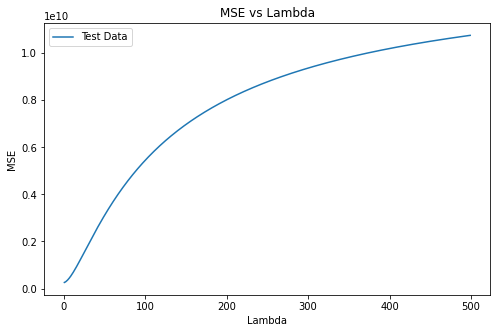

In [ ]:
# TEST DATA VS LAMBDA
l = 1
r = 500
step = 1
index = np.arange(l, r, step)

MSE_test = []
for i in np.arange(l, r, step):
    MSE_test.append(calulateMSE_test(i))


print(MSE_test)



fig = plt.figure(figsize = (8,5))
plt.title('MSE vs Lambda')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.plot(index, MSE_test, label = "Test Data")
plt.legend()